# Question 1


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [11]:
df = pd.read_csv(r'C:\Users\Kartik\Desktop\ML Lab5\iris_data.csv')

In [12]:
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
df.loc[df['class'] == 'Iris-setosa','class'] = 0
df.loc[df['class'] == 'Iris-virginica','class'] = 1
df.loc[df['class'] == 'Iris-versicolor','class'] = 2

# Visualising the data

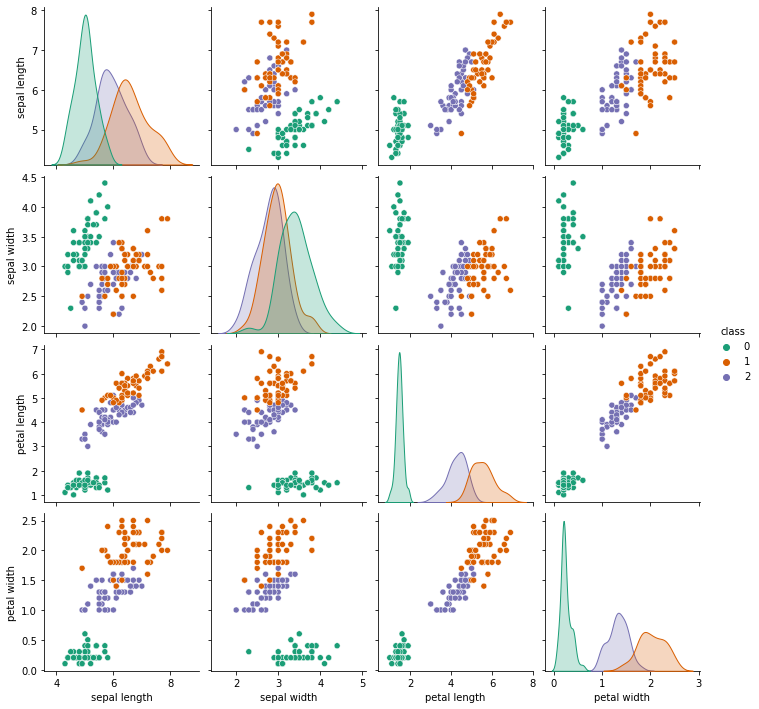

In [14]:
sns.pairplot(data=df, hue = 'class',palette='Dark2')

<AxesSubplot:>

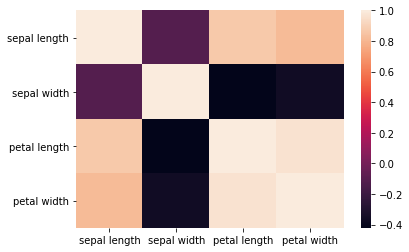

In [15]:
sns.heatmap(df.corr())

# Spliting the Data

In [16]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
p = X_train.copy()
temp = list(y_train)
p.insert(4, "class", temp, True)
p

,sepal length,sepal width,petal length,petal width,class
81,5.5,2.4,3.7,1.0,2
133,6.3,2.8,5.1,1.5,1
137,6.4,3.1,5.5,1.8,1
75,6.6,3.0,4.4,1.4,2
109,7.2,3.6,6.1,2.5,1
...,...,...,...,...,...
71,6.1,2.8,4.0,1.3,2
106,4.9,2.5,4.5,1.7,1
14,5.8,4.0,1.2,0.2,0
92,5.8,2.6,4.0,1.2,2


# Visualising for training data scatter plot

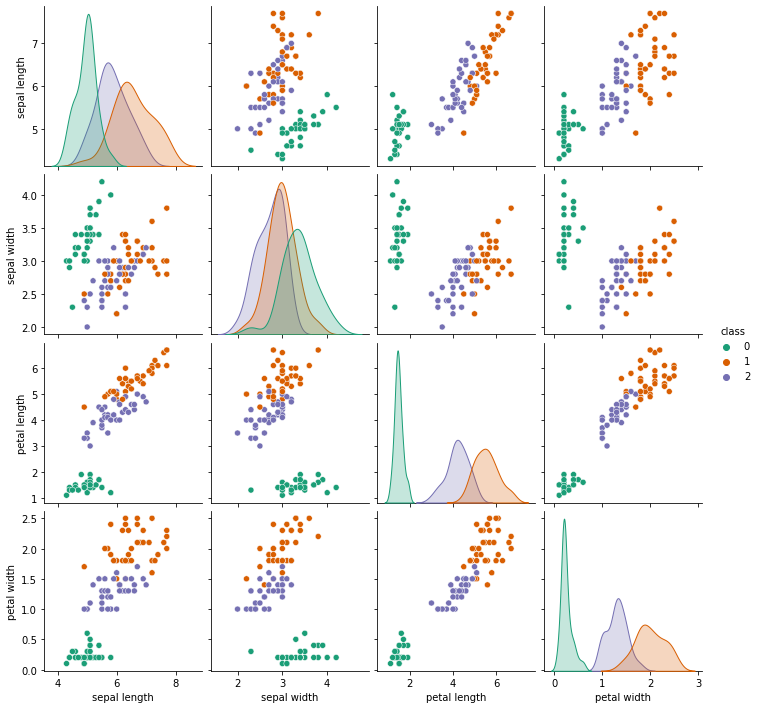

In [18]:
#for training scatter plot
sns.pairplot(data=p, hue = 'class',palette='Dark2')

In [21]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score
%matplotlib inline

# Choosing the first set of features ( Sepal Lengh, Sepal Width)

In [57]:

X1 = np.array(df[['sepal length', 'sepal width']])
y1 = np.array([int(x) for x in df.iloc[:, -1]])
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

# Training the QDA Model on the first set of features

In [27]:
qda1 = QuadraticDiscriminantAnalysis(store_covariance=True)
qda1.fit(X1_train, y1_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [28]:
pred1 = qda1.predict(X1_test)

In [29]:
accuracy_score(y1_test, pred1)

0.8

In [30]:

print(classification_report(y1_test, pred1, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        19
           1      0.625     0.769     0.690        13
           2      0.700     0.538     0.609        13

    accuracy                          0.800        45
   macro avg      0.775     0.769     0.766        45
weighted avg      0.805     0.800     0.797        45



In [31]:
df[['sepal length', 'sepal width', 'petal width']]

,sepal length,sepal width,petal width
0,5.1,3.5,0.2
1,4.9,3.0,0.2
2,4.7,3.2,0.2
3,4.6,3.1,0.2
4,5.0,3.6,0.2
...,...,...,...
145,6.7,3.0,2.3
146,6.3,2.5,1.9
147,6.5,3.0,2.0
148,6.2,3.4,2.3


# Choosing the second set of featuress (Sepal Width, petal Width)

In [33]:

X2 = np.array(df[['sepal width', 'petal width']])
y2 = np.array([int(x) for x in df.iloc[:, -1]])
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

#  Training the QDA Model on the second set of features

In [34]:
qda2 = QuadraticDiscriminantAnalysis(store_covariance=True)
qda2.fit(X2_train, y2_train)
pred2 = qda2.predict(X2_test)
accuracy_score(y2_test, pred2)

0.9777777777777777

In [35]:
print(classification_report(y2_test, pred2, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        19
           1      0.929     1.000     0.963        13
           2      1.000     0.923     0.960        13

    accuracy                          0.978        45
   macro avg      0.976     0.974     0.974        45
weighted avg      0.979     0.978     0.978        45



# Choosing the third set of features (Sepal Length and petal width) and training the QDA model

In [37]:
#choosing the third set of features 'sepal length', 'petal width', 'petal length'
X3 = np.array(df[['sepal length', 'petal width']])
y3 = np.array([int(x) for x in df.iloc[:, -1]])
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)
qda3 = QuadraticDiscriminantAnalysis(store_covariance=True)
qda3.fit(X3_train, y3_train)
pred3 = qda3.predict(X3_test)
accuracy_score(y3_test, pred3)

1.0

In [38]:
print(classification_report(y3_test, pred3, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        19
           1      1.000     1.000     1.000        13
           2      1.000     1.000     1.000        13

    accuracy                          1.000        45
   macro avg      1.000     1.000     1.000        45
weighted avg      1.000     1.000     1.000        45



# Reporting the mean and covariance on third distribution

In [39]:
#Mean score and Covariance
print(qda3.means_)
print(qda3.covariance_)

[[4.96451613 0.24516129]
 [6.55945946 2.00540541]
 [5.86216216 1.3027027 ]]
[array([[0.11569892, 0.00698925],
       [0.00698925, 0.01255914]]), array([[0.43414414, 0.04939189],
       [0.04939189, 0.0883033 ]]), array([[0.28297297, 0.05760511],
       [0.05760511, 0.04249249]])]


# Reporting the mean and covariance on second distribution

In [23]:
#Mean score and Covariance
print(qda2.means_)
print(qda2.covariance_)

[[3.36129032 0.24516129]
 [2.98648649 2.00540541]
 [2.72432432 1.3027027 ]]
[array([[0.14178495, 0.01047312],
       [0.01047312, 0.01255914]]), array([[0.09897898, 0.06146396],
       [0.06146396, 0.0883033 ]]), array([[0.08966967, 0.04215465],
       [0.04215465, 0.04249249]])]


# Reporting the mean and covariance on first distribution

In [24]:
#Mean score and Covariance
print(qda1.means_)
print(qda1.covariance_)

[[4.96451613 3.36129032]
 [6.55945946 2.98648649]
 [5.86216216 2.72432432]]
[array([[0.11569892, 0.09924731],
       [0.09924731, 0.14178495]]), array([[0.43414414, 0.09777027],
       [0.09777027, 0.09897898]]), array([[0.28297297, 0.08816817],
       [0.08816817, 0.08966967]])]


In [41]:
from scipy import linalg
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA


# Scatterplot Visualisation of Data

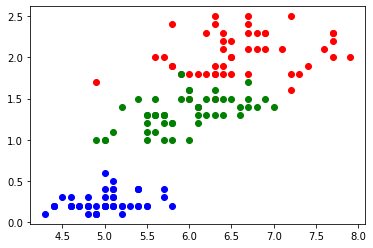

In [42]:
plt.scatter(X3[y1==0][:,0], X3[y1==0][:,1], c='b', label='0')
plt.scatter(X3[y1==1][:,0], X3[y1==1][:,1], c='r', label='0')
plt.scatter(X3[y1==2][:,0], X3[y1==2][:,1], c='g', label='0')
plt.show()

In [43]:
def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1]/u[0])
    angle = 180 * angle / np.pi # convert to degrees
    ell = mpl.patches.Ellipse(mean, 4 * v[0] ** 0.5, 4 * v[1] ** 0.5,
                                            180 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)
    splot.plot(mean[0],mean[1],"*",color="yellow",markersize=15)

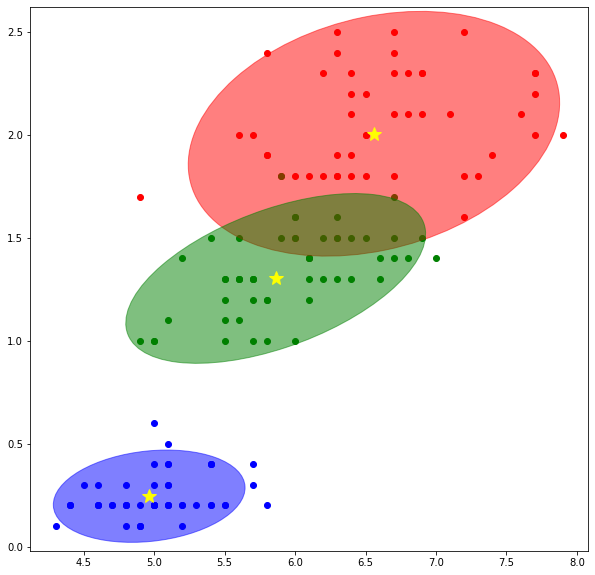

In [46]:
splot = plt.figure(figsize=(10,10))
splot = plt.subplot(1, 1, 1)

splot.scatter(X3[y3==0][:,0], X3[y3==0][:,1], c='b', label='0')
splot.scatter(X3[y3==1][:,0], X3[y3==1][:,1], c='r', label='0')
splot.scatter(X3[y3==2][:,0], X3[y3==2][:,1], c='g', label='0')

plot_ellipse(splot, qda3.means_[0], qda3.covariance_[0], 'b')
plot_ellipse(splot, qda3.means_[1], qda3.covariance_[1], 'r')
plot_ellipse(splot, qda3.means_[2], qda3.covariance_[2], 'g')

In [47]:
#xx3, yy3,zz3 = np.meshgrid(np.linspace(-5, 10, 200), np.linspace(-10, 5, 200), np.linspace(-10, 5, 200))
xx3, yy3 = np.meshgrid(np.linspace(-3, 8, 200), np.linspace(0, 2.8, 200))
X_grid3 = np.c_[xx3.ravel(), yy3.ravel()]
#X_grid3 = np.c_[xx3.ravel(), yy3.ravel(), zz3.ravel()]
probabilities_qda3 = qda3.predict_proba(X_grid3)[:,1].reshape(xx3.shape)
print(xx3.shape,yy3.shape,X_grid3.shape,probabilities_qda3.shape)

(200, 200) (200, 200) (40000, 2) (200, 200)


# Decision Boundary By The QDA Model

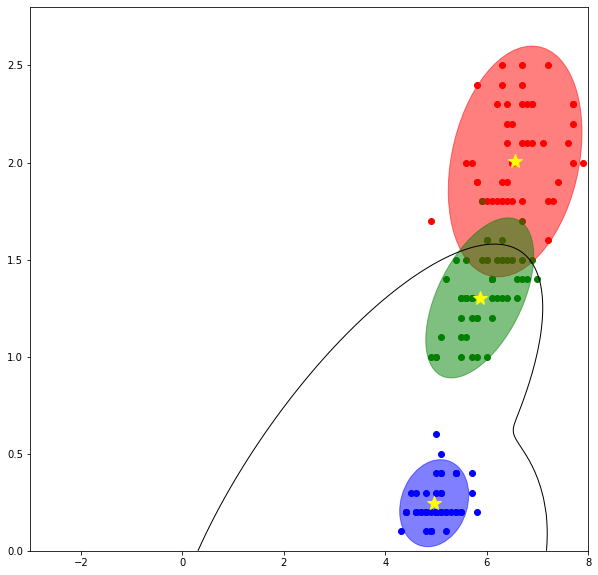

In [49]:
splot = plt.figure(figsize=(10,10))
splot = plt.subplot(1, 1, 1)

splot.scatter(X3[y3==0][:,0], X3[y3==0][:,1], c='b', label='0')
splot.scatter(X3[y3==1][:,0], X3[y3==1][:,1], c='r', label='0')
splot.scatter(X3[y3==2][:,0], X3[y3==2][:,1], c='g', label='0')

plot_ellipse(splot, qda3.means_[0], qda3.covariance_[0], 'b')
plot_ellipse(splot, qda3.means_[1], qda3.covariance_[1], 'r')
plot_ellipse(splot, qda3.means_[2], qda3.covariance_[2], 'g')


plt.contour(xx3, yy3, probabilities_qda3, [0.3], linewidths=1., colors='k')
plt.show()

# Training the LDA model for the best features

In [51]:
#training Thr lDA model #choosing the third set of features 'sepal length', 'petal width', 'petal length'
#best features
#choosing the third set of features 'sepal length', 'petal width', 'petal length'
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda1 = LinearDiscriminantAnalysis()
lda1.fit(X3_train, y3_train)

LinearDiscriminantAnalysis()

# Accuracy is 1 so the error rate by the LDA model on best set of features is 0.0

In [52]:
predLDA1 = lda1.predict(X3_test)
accuracy_score(y3_test, predLDA1)

1.0

In [38]:
#xx3, yy3,zz3 = np.meshgrid(np.linspace(-5, 10, 200), np.linspace(-10, 5, 200), np.linspace(-10, 5, 200))
xxnew, yynew = np.meshgrid(np.linspace(-2, 10, 200), np.linspace(-2, 5, 200))
X_grid3new = np.c_[xxnew.ravel(), yynew.ravel()]
#X_grid3 = np.c_[xx3.ravel(), yy3.ravel(), zz3.ravel()]
probabilities_ldanew = ldanew.predict_proba(X_grid3new)[:,1].reshape(xxnew.shape)
print(xxnew.shape,yynew.shape,X_grid3new.shape,probabilities_ldanew.shape)

(200, 200) (200, 200) (40000, 2) (200, 200)


# Plotting the Decision Boundary given by LDA model on the top of the scatterplot visualisation

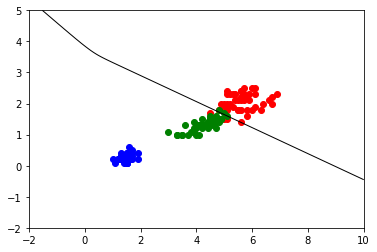

In [39]:
plt.figure()
splot = plt.subplot(1, 1, 1)

splot.scatter(Xnew[ynew==0][:,0], Xnew[ynew==0][:,1], c='b', label='0')
splot.scatter(Xnew[ynew==1][:,0], Xnew[ynew==1][:,1], c='r', label='0')
splot.scatter(Xnew[ynew==2][:,0], Xnew[ynew==2][:,1], c='g', label='0')



plt.contour(xxnew, yynew, probabilities_ldanew, [0.6], linewidths=1., colors='k')
plt.show()

# Question 2

In [53]:
Xnew = np.array(df[['petal length', 'petal width']])
ynew = np.array([int(x) for x in df.iloc[:, -1]])
Xnew_train, Xnew_test, ynew_train, ynew_test = train_   test_split(Xnew, ynew, test_size=0.3, random_state=42)

In [54]:
ldanew = LinearDiscriminantAnalysis(store_covariance=True)
ldanew.fit(Xnew_train, ynew_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [55]:
predLDAnew = ldanew.predict(Xnew_test)
accuracy_score(ynew_test, predLDAnew)

1.0

# sample mean and sample covariance matrix of each class

In [56]:
print(ldanew.means_)
print(ldanew.covariance_)

[[1.46774194 0.24516129]
 [5.54594595 2.00540541]
 [4.21081081 1.3027027 ]]
[[0.19576485 0.04899896]
 [0.04899896 0.0484326 ]]
